In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns

import scipy.stats as stats

from math import *

from numpy.linalg import eigh,inv

from tqdm import tqdm

from IPython.core.display import HTML

## 1. Finite difference discretization


Σημείωση :

Mας ζητείτε ένα grid 40x40 με $Δx = Δy = \frac{1}{40}$. Παρόλα αυτά δεν γίνεται να κατασκευαστεί αυτό καθώς όπως φαίνεται και στο παρακάτω σχήμα αν θέλουμε να αναπαραστήσουμε A σημεία με ίση απόσταση μεταξύ τους τότε αυτά πρέπει να έχουν απόσταση $\frac{1}{A-1}$. Συνεπώς θεωρούμε ότι έχουμε ένα grid $41x41$ με απόσταση μεταξύ τους τα σημεία $\frac{1}{40}$.

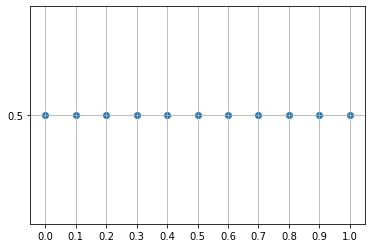

In [2]:
x = np.arange(0, 1.1, 0.1)
y = 11*[0.5]

fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.set_yticks(np.arange(0, 1.1, 0.1))
plt.scatter(x, y)
plt.grid()
plt.show()

Στο κομμάτι αυτό στόχος μας είναι η κατασκευή ενός συστήματος για την εύρεση $41x41$ μεταβλητών. Το σύστημα μας θα έχει τη μορφή **Κx = b**.

- O πίνακας **x** έχεις τις μεταβλητές προς εύρεση δηλαδή τις θερμοκρασίες Τ(x,y) για $x,y\in[0,1]$ με $Δx = Δy = \frac{1}{40}$.
- O πίνακας **b** εχει τις τιμές για την **-f(x,y)** οπου $x,y\in[0,1]$ με $Δx = Δy = \frac{1}{40}$.
- Ο πίνακας **Κ** είναι αυτός που θα κατασκευάσουμε για να έχουμε έτοιμο το σύστημα.

Εξετάζοντας το σχέση που προκύπτει :
$\frac{T(x+h,y)-2T(x,y)+T(x-h,y)}{Dx^2} + \frac{T(x,y+h)-2T(x,y)+T(x,y-h)}{Dy^2} = -f(x,y)$

Παρατηρούμε ότι ο πίνακας **K** θα αποτελέιται από 5 διαγώνιους, μια διαγώνιο για κάθε διαφορετικό όρο της $T$.

- T(x,y) : Κεντρική Διαγώνιος με τιμή $-\frac{2}{Dx^2}-\frac{2}{Dy^2}$
- T(x+h,y) : Διαγώνιος Dimension_x θέσεις δεξιά από την Κεντρική με τιμή $\frac{1}{Dx^2}$
- T(x-h,y) : Διαγώνιος Diamension_x θέσεις αριστερά από την Κεντρική με τιμή $\frac{1}{Dx^2}$
- T(x,y+h) : Διαγώνιος μια θέση δεξιά της Κεντρικής με τιμή $\frac{1}{Dy^2}$
- T(x,y-h) :  Διαγώνιος μια θέση αριστερά της Κεντρικής με τιμή $\frac{1}{Dy^2}$

 Οι οριακές συνθήκες (Dirichlet Boundary conditions) μας δίνουν την δυνατότητα να γνωρίζουμε ότι :
- T(0,y) = 0
- T(40,y) = 0
- T(x,0) = 0
- T(x,40) = 0

Επομένως πλέον εχόυμε να βρούμε την τιμή $39x39 = 1521$ μεταβλητών, και ο πίνακας **Κ** θα έχει διαστάσεις $(1521,1521)$ , από $(1681,1681)$ , $(41*41=1681)$

In [3]:
def print_matrix(matrix):
    df=pd.DataFrame(matrix)
    display(HTML(df.to_html()))

In [4]:
def Equation_Matrix(dim_x=41,dim_y=41):    
    ## 0 -> 40 : 41 blocks
    nx = dim_x
    ny = dim_y
    Dx=1/(nx-1)
    Dy=1/(ny-1)

    ## Dirichlet Boundary conditions , x=0 -> T=0 && x=40 -> T=0, x=[1,39]->Diam_x = nx-2 // y=0 -> T=0, we start from x=1
    ## x == 0 -> T = 0 && x == 40 -> T=0, x = [1,39] -> Diam_x = nx-2

    Diam_x = nx-2

    ## y == 0 -> T = 0 && y == 40 -> T=0, y = [1,39]- > Diam_y = ny-2

    Diam_y = ny-2


    Dimensions = (Diam_x**2,Diam_y**2)

    First_Diagonal = 1/Dx**2
    Second_Diagonal = 1/Dy**2

    Main_Diagonal = -(2/Dx**2)-(2/Dy**2)

    Fourth_Diagonal = 1/Dy**2
    Fifth_Diagonal = 1/Dx**2

    matrix = np.zeros((Dimensions))
    
    ## First_Diagonal
    np.fill_diagonal(matrix[Diam_y:], First_Diagonal)

    ## Second Diagonal
    np.fill_diagonal(matrix[1:], Second_Diagonal)

    ## Main Diagonal
    np.fill_diagonal(matrix, Main_Diagonal)

    ## Fourth Diagonal
    np.fill_diagonal(matrix[:,1:], Fourth_Diagonal)

    ## Fifth Diagonal
    np.fill_diagonal(matrix[:,Diam_x:], Fifth_Diagonal)
    
    return matrix

In [5]:
matrix_6_6=Equation_Matrix(6,6)
print("!!!! Example !!!!")
print_matrix(matrix_6_6)

!!!! Example !!!!


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-100.0,25.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25.0,-100.0,25.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,25.0,-100.0,25.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,25.0,-100.0,25.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,25.0,0.0,0.0,25.0,-100.0,25.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,25.0,0.0,0.0,25.0,-100.0,25.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,25.0,0.0,0.0,25.0,-100.0,25.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,25.0,0.0,0.0,25.0,-100.0,25.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,25.0,0.0,0.0,25.0,-100.0,25.0,0.0,0.0,25.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,25.0,-100.0,25.0,0.0,0.0,25.0,0.0,0.0


In [6]:
matrix=Equation_Matrix()
print(matrix.shape)

(1521, 1521)


## 2. Monte Carlo Simulation

Έχοντας πλέον τον πίνακα **Κ** , θα καθορίσουμε τον πίνακα **b**. Ο πίνακας **b** έχει μέσα την τυχαία μεταβλητή $r \sim
\mathcal{N}(0.05,0.005)$.

Για να προσεγγίσουμε την probability density function της $T(0.5,0.5)$ , θα παράξουμε ένα **N_sim** μεγάλο αριθμό δειγμάτων $r_{i}$ και θα λύσουμε το συστημα μας για κάθε ένα από αυτά τα δείγματα. Κάθε φορά που έχουμε μια λύση του συστήματος θα συλλέγουμε την $T(0.5,0.5)$ η οποία θα αντιστοιχή στο $760$ index του πίνακα μεταβλητων μας.

Αρχικά παρουσιάζεται η κατανομή της f(0.5,0.5) από την οποία ίσως μπορούμε να πάρουμε μια πρώτη εκτίμηση για την μορφή της κατανομής που αναμένουμε για την Τ(0.5,0.5)

In [7]:
def r(mu = 0.05,sigma = 0.005):
    random = np.random.normal(mu,sigma)
    return random

def f1(x,y,r):
    ret=(((x - 0.55)**2 + (y - 0.45)**2)*(-1/r))
    return (-100) * np.exp(ret)

monte_carlo_f = []
Sim=50000
for i in tqdm(range(Sim),total=Sim):
    monte_carlo_f.append(f1(0.5,0.5,r()))

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:00<00:00, 62484.18it/s]


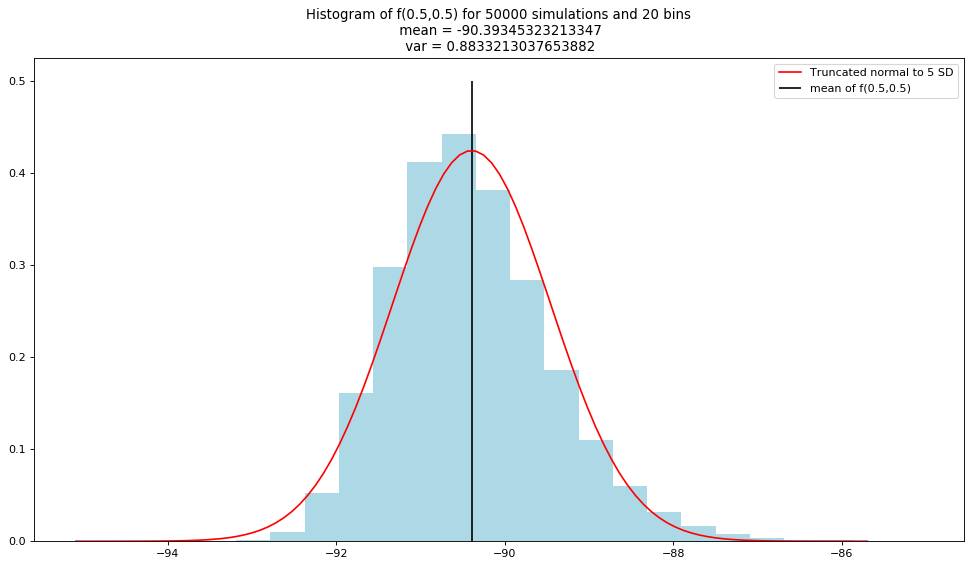

In [8]:
figure(figsize=(15, 8), dpi=80)
plt.hist(monte_carlo_f, bins = 20,density=True , color = "lightblue")
mu50000_mc = np.mean(monte_carlo_f)
var50000_mc = np.var(monte_carlo_f)

title = 'Histogram of f(0.5,0.5) for 50000 simulations and 20 bins\n mean = ' + str(mu50000_mc) + "\n var = "+str(var50000_mc)

mu = mu50000_mc
variance = var50000_mc
sigma = sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma),label = "Τruncated normal to 5 SD",color = "red")
plt.vlines(np.mean(mu), ymin = 0, ymax = 0.5,label = "mean of f(0.5,0.5)")
plt.legend()
plt.title(title)
plt.show()

In [9]:
x = 0
num=0
for k in range(0,39):
            
        x = x + 1/40
        x = round(x, 4)
        y = 0    
        
        for l in range(0,39):
                
            y =  y + 1/40
            y = round(y, 4)
            if (x==0.5) and (y==0.5): 
                print("Index = ",num)
                break
            num=num+1

Index =  760


In [10]:
index = 760

In [11]:
def f(x,y,r):
    ret = [] 
    for i in x:
        for j in y:
            ret.append(((i - 0.55)**2 + (j - 0.45)**2)*(-1/r))
    return (-100) * np.exp(ret)

In [12]:
matrix_inv=inv(matrix)

def simulation(N_sim,dim_x=41,dim_y=41,K_inv=matrix_inv,index=index):
    solutions = []
    
    Dx=1/(dim_x-1)
    Dy=1/(dim_y-1)
    
    nx = np.linspace(Dx,1-Dx,dim_x-2)
    ny = np.linspace(Dy,1-Dy,dim_y-2)
    
    for i in tqdm(range(N_sim),total=N_sim):
        
        #Construct b matrix
        b = f(nx,ny,r())
        
        #Solve linear system
        solutions.append(np.dot(K_inv,b))
    
    return(np.array(solutions).T[index])
        

In [13]:
T_50000 = simulation(50000)

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [06:27<00:00, 129.12it/s]


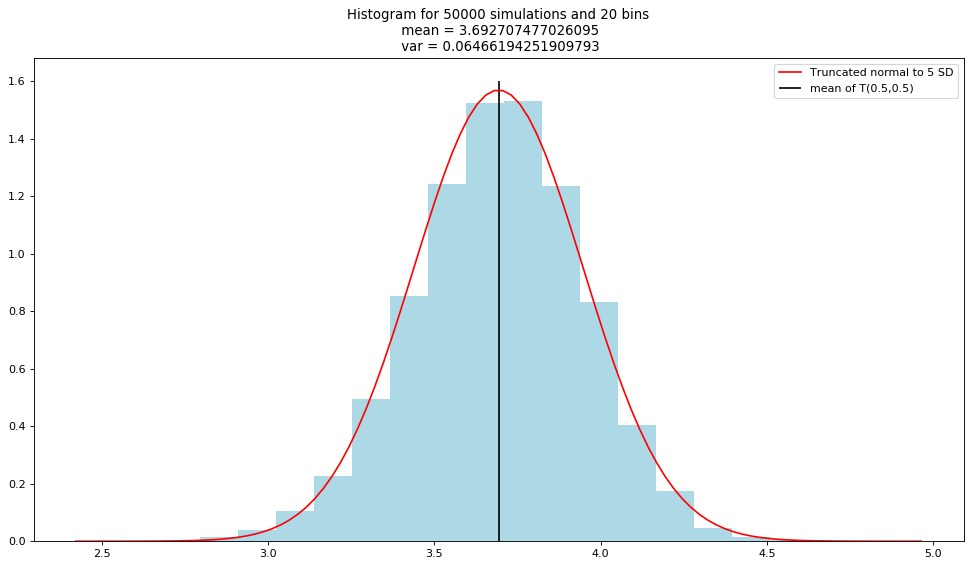

In [14]:
figure(figsize=(15, 8), dpi=80)

plt.hist(T_50000, bins = 20,density=True , color = "lightblue")
mu50000 = np.mean(T_50000)
var50000 = np.var(T_50000)
title = 'Histogram for 50000 simulations and 20 bins\n mean = ' + str(mu50000) + "\n var = "+str(var50000)

mu = mu50000 
variance = var50000
sigma = sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma),label = "Τruncated normal to 5 SD",color = "red")
plt.vlines(np.mean(mu), ymin = 0, ymax = 1.6 ,label = "mean of T(0.5,0.5)")
plt.legend()
plt.title(title)
plt.show()

Παρατηρούμε ότι η probability density function του Τ(0.5,0.5) μπορεί να προσεγγιστεί πάρα πολύ καλά από μια Gaussian με τα αντίστοιχα mean και variance. Φυσικά αναφερόμαστε σε φραγμένη Gaussian καθώς δεν μπορούμε να πάρουμε τιμές πέρα από ένα συγκεκριμένο εύρος.

## 3. PCA/POD

Παρατηρήσαμε ότι η λύση του συστήματος είναι χρονοβόρα και σε συνδυασμό με τον μεγάλο αριθμό N_sim Monte Carlo προσομοιώσεων είχαμε αρκετή αναμονή. Επομένως καλούμαστε να μειώσουμε τις διαστάσεις του συστήματος με την εφαρμογή του αλγορίθμου PCA/POD.

Αρχικά κατασκευάζουμε το dataset μας που θα είναι ένας πίνακας $39xM$ οπου **$M << N\_sim$**, δηλαδή $V=[u_1,u_2,...,u_m]$

In [15]:
def Dataset(M,dim_x=41,dim_y=41,K_inv=matrix_inv,index=index):
    solutions = []
    
    Dx=1/(dim_x-1)
    Dy=1/(dim_y-1)
    
    nx = np.linspace(Dx,1-Dx,dim_x-2)
    ny = np.linspace(Dy,1-Dy,dim_y-2)
    
    for i in tqdm(range(M),total=M):
        
        #Construct b matrix
        b = f(nx,ny,r())
        
        #Solve linear system
        solutions.append(np.dot(K_inv,b))
    
    return(np.array(solutions).T)


In [16]:
dataset = Dataset(50)

100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 100.98it/s]


In [17]:
dataset.shape

(1521, 50)

Στη συνέχεια υπολογίζουμε τα eigenvalues και eigenvectors για τον πίνακα $Dataset * Dataset.T$ και κρατάμε τα Κ eigenvectors που αντιστοιχούν στα Κ μεγαλύτερα eigenvalues.

In [18]:
analysis_array=np.dot(dataset,dataset.T)
values, vectors = eigh(analysis_array)

In [19]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(values)[::-1]
 
sorted_eigenvalues = values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = vectors[:,sorted_index]


In [20]:
cumul=np.cumsum(sorted_eigenvalues)
su=np.sum(sorted_eigenvalues)
variance_ret=cumul/su

In [21]:
pc=10
print("Total variance retained for",pc,"components",variance_ret[:pc])

Total variance retained for 10 components [0.9999322  0.99999997 1.         1.         1.         1.
 1.         1.         1.         1.        ]


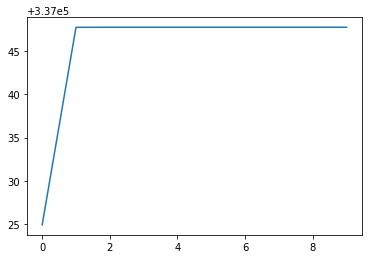

In [22]:
plt.plot(cumul[:pc])

Γνωρίζουμε ότι το συνολικό variance είναι το άθροισμα των ιδιοτιμών, και παρατηρούμε ότι μόνο με την πρώτη ιδιοτιμή μπορούμε να εκφράσουμε το 0.99999% του variance

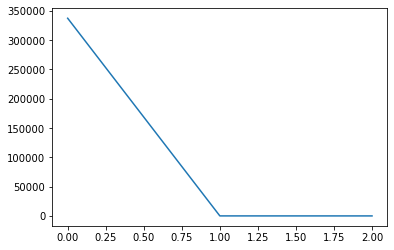

In [23]:
plt.plot(sorted_eigenvalues[:3])

Επί πρόσθετα, παρατηρούμε την μεγάλη πτώση από τη δεύτερη ιδιοτιμή και μετά. Τα δεδομένα αυτά μας οδηγούν στο να επιλέξουμε για pca_components = 1, δηλαδή να υπολογίσουμε μόνο το ιδιοδιάνυσμα που αντιστοιχεί στην μεγαλύτερη ιδιοτιμή.

Τέλος πραγματοποιούμε πάλι **Monte Carlo Simulation** με το νέο μειωμένων διαστάσεων σύστημα. Πιο συγκεκριμένα έχουμε **$K_{new}*u=b_{new}$**, όπου:

- $u$ είναι το ζητούμενο
- $K_{new} = Eigenvectors.T*K*Eigenvectors$
- $b_{new} = Eigenvectors.T*b$

Κάθε μία λύση μπορούμε να την μεταφέρουμε στις αρχικές διαστάσεις ως εξής:

- $U_{original} = Eigenvectors * u$

Επομένως λύνουμε το σύστημα για την εύρεση του $u$ N_sim φορές, και κάθε φορά πραγματοποιούμε την μεταφορά στις αρχικές διαστάσεις από οπού επιλέγουμε το index = 760, δηλαδή το Τ(0.5,0.5) και σχεδιάζουμε το ιστόγραμμα για να παρατηρήσουμε την κατανομή του.

In [24]:
def simulation_pca(N_sim,pca_components,dim_x=41,dim_y=41,K=matrix,index=index,eigenvectors=sorted_eigenvectors):
    solutions = []
    
    Dx=1/(dim_x-1)
    Dy=1/(dim_y-1)
    
    nx = np.linspace(Dx,1-Dx,dim_x-2)
    ny = np.linspace(Dy,1-Dy,dim_y-2)
    
    phi_vectors = sorted_eigenvectors[:,:pca_components]
    phi_vectors_T = phi_vectors.T
    
    K_red = np.linalg.multi_dot([phi_vectors_T,K,phi_vectors])
    
    K_red_inv = inv(K_red)
    
    for i in tqdm(range(N_sim),total=N_sim):
        
        #Construct b matrix
        b = f(nx,ny,r())
        
        # b_new matrix
        F_red=np.dot(phi_vectors_T,b)
        
        #Solve linear system
        solutions.append(np.dot(K_red_inv,F_red))
    
    # acquire original dimensions    
    original = np.dot(phi_vectors,np.array(solutions).T)
    
    return(original[index])
    

In [25]:
T_pca_50000 = simulation_pca(50000,1)

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [04:51<00:00, 171.59it/s]


In [26]:
def plotpdfs(T_50000,T_pca_50000):
    figure(figsize=(15, 8), dpi=80)

    plt.hist(T_50000, bins = 20,density=True , color = "lightblue",label = "Original Histogram")
    mu50000 = np.mean(T_50000)
    var50000 = np.var(T_50000)

    plt.hist(T_pca_50000, bins = 20,density=True,label = "PCA Histogram")
    mu_pca50000 = np.mean(T_pca_50000)
    var_pca50000 = np.var(T_pca_50000)

    mu = mu50000 
    variance = var50000
    sigma = sqrt(variance)
    x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma),label = "Gaussian_Original",color = "red")
    plt.vlines(np.mean(mu), ymin = 0, ymax = 1.6 ,label = "mean of T(0.5,0.5)")

    mu = mu_pca50000 
    variance = var_pca50000
    sigma = sqrt(variance)
    x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma),label = "Gaussian_PCA",color = "green")
    plt.vlines(np.mean(mu), ymin = 0, ymax = 1.6 ,label = "mean of PCA_T(0.5,0.5)",color="lightgreen")
    title = 'Histogram AFTER PCA for 50000 simulations and 20 bins\n mean = ' + str(mu_pca50000) + "\n var = "+str(var_pca50000)
    plt.legend()
    plt.title(title)
    plt.show()

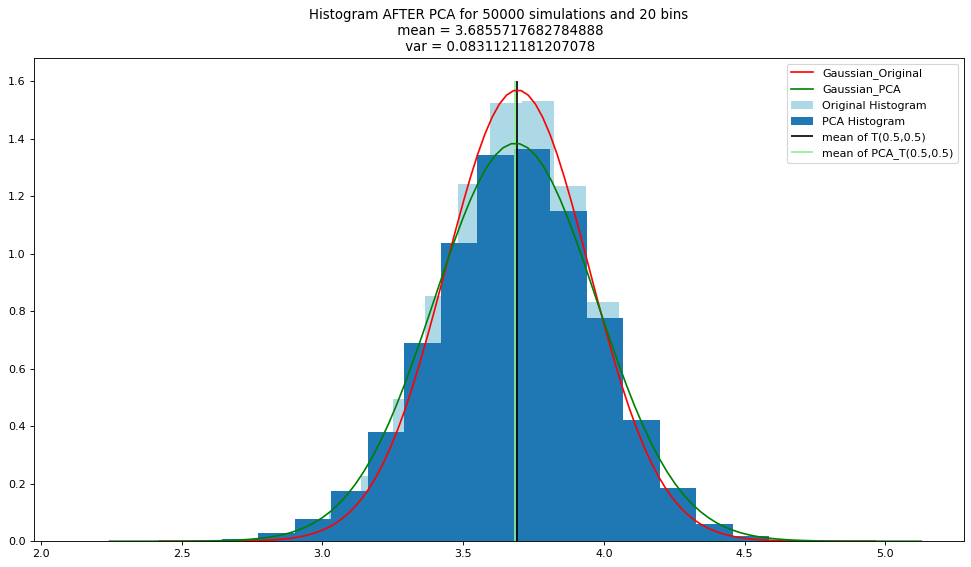

In [27]:
plotpdfs(T_50000,T_pca_50000)

Παρατηρούμε πολύ μεγάλη ομοιότητα στις δύο probability density functions , όπως επίσης και την ομοιότητα τους με την αντίστοιχη Gaussian. To μεγάλο explainability της ιδιοτιμής έχει συμβάλλει σε αυτό το αποτέλεσμα.

Μπορούμε να αυξήσουμε τα pca_components αν θελήσουμε να έχουμε μια καλύτερη προσέγγιση. Παρατηρούμε ότι για pca_components = 3 έχουμε ελαφρώς βελτιωμένο το variance και μια καλύτερη προσέγγιση της pdf.

In [28]:
T_pca_50000_3 = simulation_pca(50000,3)

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [04:46<00:00, 174.35it/s]


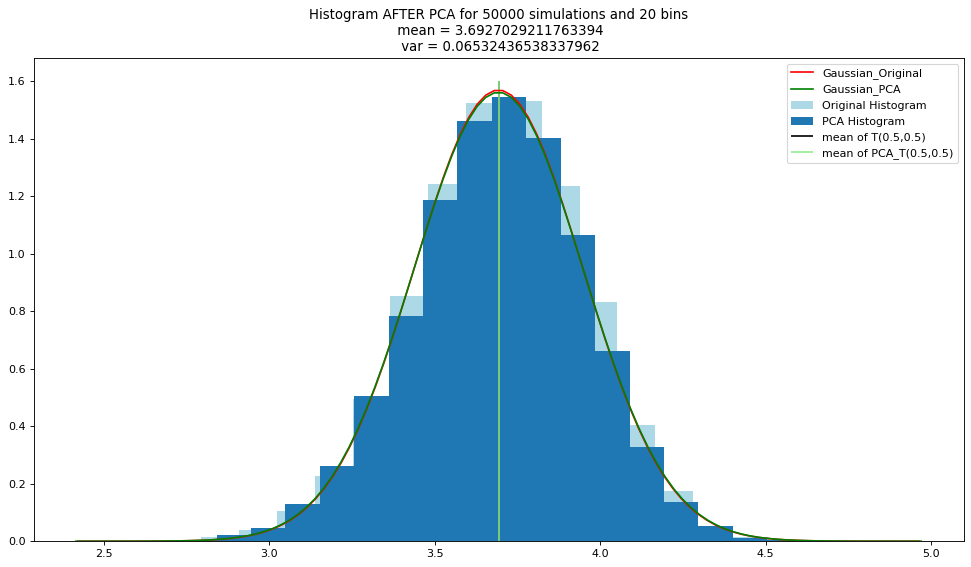

In [29]:
plotpdfs(T_50000,T_pca_50000_3)